# **Support Vector Machine Model**

### How can NLP be used to identify social media posts that are relevant to Covid-19?


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

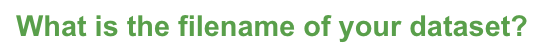

In [ ]:
dataset = pd.read_csv(#Covid19_captions, delimiter = '\t', quoting = 3)

- tsv files contain elements seperated by tabs and csv files contain elements seperated by commas which can interfere with the commas within the text so we use tsv files for NLP
- delimiter argument is used to specify to the read_csv method that this file is in tsv format
- quoting = 3 is needed to ensure that the use of quotes in the text are not misinterpreted

## Cleaning the texts

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
# this list will contain only the 'cleaned' words
for i in range(0, 34):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Captions'][i])
  # the 1st argument specifies what should be replaced, the 2nd one specifies the replacement term and the 3rd one specifies the location of the term
  review = review.lower()
  review = review.split()
  # this splitting is done to get individual words so that the stem method can be applied to each word
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Types of 'cleaning' done:
- removal of stopwords(i.e. 'the', 'a', 'on')
- retrieving the essence/base form of remaining words(i.e. 'love' instead of 'loved'
- replacing of non-alphabetical features with spaces
- uppercase to lower case  

In [ ]:
print(corpus)

['guy seven billion covid vaccin dose administ global not vaccin live countri vaccin wide avail think excus anymor time see signific reaction larg amount vaccin would see alreadi hidden agenda', 'novemb mean month left also mean month accomplish goal far', 'multi ministri taskforc announc workforc vaccin measur keep workplac safe jan employe fulli vaccin recov covid within past day return workplac', 'updat safe manag measur take note head shop mall store effect oct let part build covid resili singapor', 'got booster vaccin shot today', 'got second covid vaccin jab today igotmyshot', 'work healthcar tire profess', 'share respons ensur sustain climat breathabl air futur gener', 'test neg covid arttest singapor', 'jordan lost job pandem not one lucki found mentalhealth support get difficult time need mental health care everyon everywher', 'billion peopl vision impair blind least billion could prevent yet address take care eye get check regularli', 'announc ministri health may regular surv

## Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the SVM model on the Training set

In [ ]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier()
classifier.fit(X_train, y_train)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)